### Importing Libraries and load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("A:/EDA Projects/ipl_2023_dataset.csv")

In [3]:
data.shape

(568, 7)

In [4]:
data.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


### Data Types

In [5]:
data.dtypes

Player Name          object
Base Price           object
Type                 object
Cost in Rs. (CR)    float64
Cost in $ (K)       float64
2022 Squad           object
2023 Squad           object
dtype: object

In [6]:
data.describe()

,Cost in Rs. (CR),Cost in $ (K)
count,243.000000,243.000000
mean,0.687243,82.469136
std,2.511700,301.404032
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.200000,24.000000
max,18.500000,2220.000000


### Checking for missing values

In [7]:
data.isna().sum()

Player Name           0
Base Price            0
Type                  0
Cost in Rs. (CR)    325
Cost in $ (K)       325
2022 Squad          338
2023 Squad            0
dtype: int64

### Visualizing Missing Values

<AxesSubplot:>

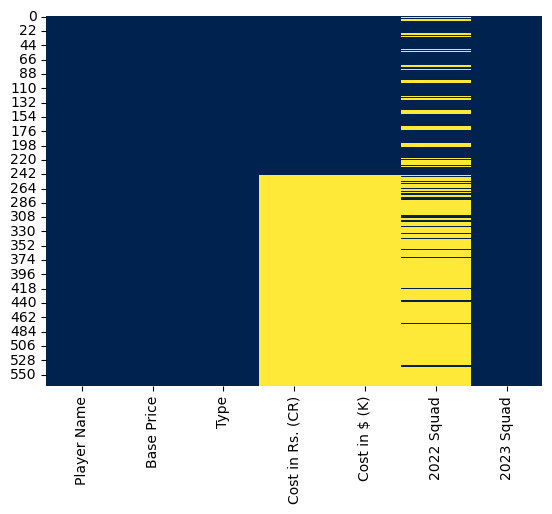

In [8]:
sns.heatmap(data.isna(), cbar=False, cmap='cividis')

We have a lot of missing values in cost in Rs. and cost in $ (K) and 2023 Squad

### Repacing the missing values

In [9]:
cols_num = ['Cost in Rs. (CR)', 'Cost in $ (K)']
for col1 in cols_num:
    data[col1] = pd.to_numeric(data[col1])
    data[col1].fillna(data[col1].mean(), inplace=True)

In [10]:
data['2022 Squad'] = data['2022 Squad'].fillna(data['2022 Squad'].mode(), inplace=True)

In [11]:
data.tail()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
563,Dhruv Patel,2000000,ALL-ROUNDER,0.687243,82.469136,None,Unsold
564,Jack Prestwidge,2000000,ALL-ROUNDER,0.687243,82.469136,None,Unsold
565,Aditya Sarvate,2000000,ALL-ROUNDER,0.687243,82.469136,None,Unsold
566,Sagar Solanki,2000000,ALL-ROUNDER,0.687243,82.469136,None,Unsold
567,Prenelan Subrayen,2000000,ALL-ROUNDER,0.687243,82.469136,None,Unsold


### Visualizations

### Univaraite Analysis for type of players

<AxesSubplot:xlabel='Type', ylabel='Count'>

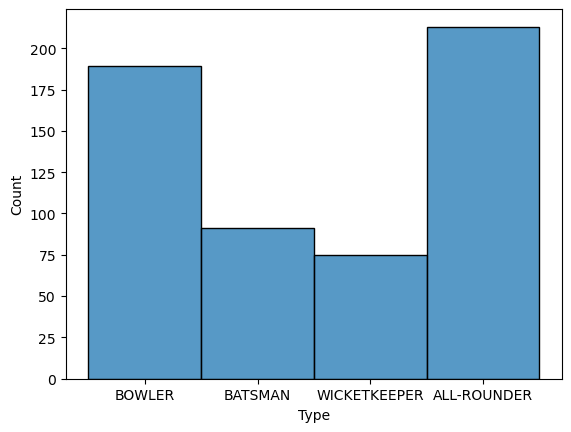

In [12]:
sns.histplot(data.Type, bins=4)

# The most type of players are all-rounders

### What is the relation between type of player and their cost?

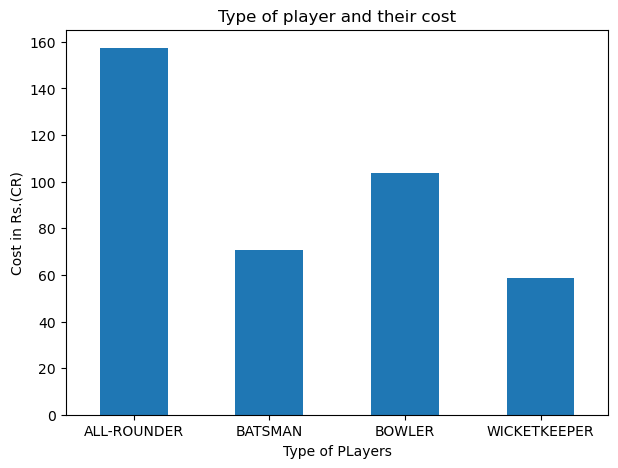

In [13]:
players_group = data.groupby('Type')['Cost in Rs. (CR)'].sum()
players_group.plot(kind='bar', title='Type of player and their cost', ylabel='Cost in Rs.(CR)', 
                 xlabel='Type of PLayers', figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

We can observe from the plot that investors are prefering all-rounders

### What is the average base price?

<AxesSubplot:xlabel='Base Price', ylabel='Count'>

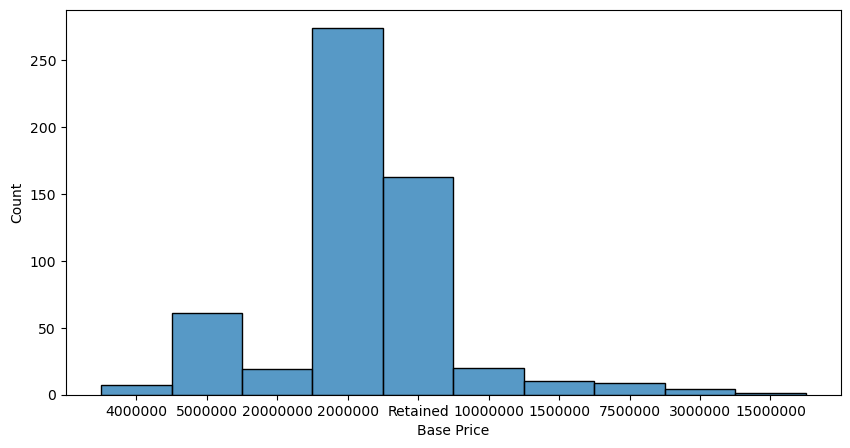

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Base Price')

We can observe from the plot that the average base price is 2000000

### Comparision of type of player and their respective teams 

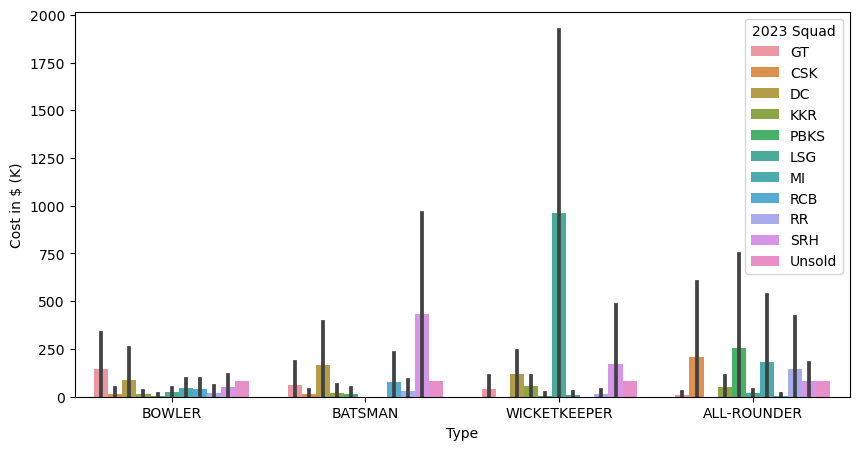

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='Type', y='Cost in $ (K)', hue='2023 Squad')
plt.show()

With the barplot, we can conclude that the investors invested bowlers more in GT, batsman more in SRH, wicketkeeper more in LSG, and all-rounder more in PBKS